# 계산 그래프

- 계산 그래프(computational graph) : 계산 과정을 그래프로 나타낸 것
- 복수의 노드(node)와 에지(edge)로 표현

## 계산 그래프로 풀다

- *문제1 : 현빈 군은 슈퍼에서 1개에 100원 사과를 2개 샀습니다. 이떄 지불한 금액을 구하세요. 단, 소비세는 10% 부과 됩니다.*

- 계산 그래프는 계산 과정을 노드와 화살표로 표현
- 노드는 원으로 표기, 원 안에 연산 내용 표기
- 계산 결과는 화살표 위에 적어 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전해지게 한다
- 다음은 1번 문제의 답을 계산 그래프로 표현한 것
<img src='images/fig 5-1.png' width=500>
- 처음에 사과의 100원이 'x2'노드로 흐르고
- 200원이 되어 다음 노드로 전달
- 200원이 'x1.1' 노드를 거쳐 220원이 된다
- 최종 답은 220원

<img src='images/fig 5-2.png' width=500>
- '2'와 '1.1'은 각각 '사과의 개수'와 '소비세'변수가 되어 원 밖에 표기

- *문제2 : 현빈 군은 슈퍼에서 사과 2개, 귤 3개를 샀습니다. 사과는 1개에 100원, 귤은 1개의 150원입니다. 소비세가 10% 일 때 지불 금액은?*

<img src='images/fig 5-3.png' width=500>
- '+'가 새롭게 등장, 사과와 귤의 금액 합산
- 왼쪽에서 오른쪽으로 계산

- 전체 흐름
    1. 계산 그래프를 구성
    2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행
- 위의 2 번을 순전파 라고 한다    

## 국소적 계산

- 계산 그래프의 특징, '국소적 계산'을 전파함으로써 최종 결과를 얻는다
- 국소적이란 '자신과 직접 관계된 작은 범위'
- 국소적 계산은 결국 전체에 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과 출력 가능

- 국소적 계산 사례 : 슈퍼마켓에서 사과 2개를 포함한 여러 식품을 구입하는 경우
<img src='images/fig 5-4.png' width=500>
- 복잡한 계산을 거쳐 총액이 4,000원
- 총합을 구하는 계산과 상관없이, 각 노드에서의 계산은 국소적이다
- 각 노드는 자신과 관련된 계산(이 예에서는 입력된 두 숫자의 덧셈) 외에는 아무것도 신경 쓰지 않는다.

## 왜 계산 그래프로 푸는가

- 계산 그래프의 이점
    - 국소적 계산이 가능
    - 중간 계산 결과를 모두 보관 가능
    - 역전파를 통해 '미분'을 효율적으로 계산 가능
    
<img src='images/fig 5-5.png' width=500>

- 사과 값이 오르면 최종 금액에 얼마나 영향을 미치는가
- 사과 값을 $x$, 지불 금액 $L$라고 하면, $\frac{\partial L}{\partial x}$ 을 구해야 한다.
- 역전파는 순전파의 반대 방향으로 화살표 표시
- 이 역전파는 '국소적 미분'을 전달
- 사과 가격에 대한 지불 금액의 미분 값은 2.2 : 사과가 1원 오르면 최종 금액은 2.2 원 오른다

# 연쇄법칙

- 국소적 미분을 전달하는 원리를 연쇄법칙(chain rule)를 따른다
- 연쇄법칙은 계산 그래프상의 역전파와 동일

## 계산 그래프와 역전파

- 계산 그래프의 역전파 : 순방향과 반대 방향으로 국소적 미분을 곱한다
<img src='images/fig 5-6.png' width=300>
- 신호 $E$에 노드의 국소적 미분 $\frac{\partial y}{\partial x}$ 를 곱한 후 다음 노드로 전달
- 여기서 말하는 국소적 미분은 순전파 ($y=f(x)$) 계산의 미분을 구한다는 의미
- 가령 $y=f(x)=x^2$ 이라면 $\frac{\partial y}{\partial x} = 2x$ 가 된다.
- 이 것을 앞쪽 노드에서 전달된 값$E$에 곱하여 앞쪽 노드에 전달 한다
- 이러한 방식을 따르면, 목표로 하는 미분 값을 효율적으로 구할 수 있다.

## 연쇄법칙이란?

- 합성 함수란, 여러 함수로 구성된 함수
- $z = (x+y)^2$ 란 식은 다음과 같이 두개의 식으로 구성 된다.
<img src ='images/e 5.1.png' width=100>
- *합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다*
<img src ='images/e 5.2.png' width=100>

<img src ='images/e 5.3.png' width=80>

<img src ='images/e 5.4.png' width=200>

## 연쇄법칙과 계산 그래프

- 순전파와는 반대 방향으로 국소적 미분을 곱하여 전달
<img src='images/fig 5-7.png' width=500>

<img src='images/fig 5-8.png' width=500>

# 역전파

## 덧셈 노드의 역전파

- $z = x + y$ 라는 식을 대상으로 역전파 설명
- $z = x + y$의 미분은 다음과 같이 해석학적으로 계산 가능
- 왼쪽이 순전파, 오른쪽이 역전파
<img src ='images/e 5.5.png' width=60>
- 덧셈 노드의 역전파는 입력값을 그대로 흘려 보낸다
<img src='images/fig 5-9.png' width=500>
- 최종 출력으로 가는 계산의 중간에 덧셈 노드가 존재
- 역전파에서는 국소적 미분이 가장 오른쪽의 출력에서 시작하여 노드를 타고 역방향으로 전파
<img src='images/fig 5-10.png' width=500>
- '10 + 5 = 15' 라는 계산에서, 상류에서 1.3 이라는 값이 흘러 온다.
- 덧셈 노드는 이를 그대로 흘려 보낸다.
<img src='images/fig 5-11.png' width=500>

## 곱셈 노드의 역전파

- $z = xy$라는 식을 상정 하여 설명
- 각 편미분은 다음과 같음
<img src ='images/e 5.6.png' width=60>
- 곱셈노드의 역전파는 오른쪽
<img src='images/fig 5-12.png' width=500>
- 상류의 값에 순전파의 값을 서로 바꿔 곱하여 하류로 보낸다.
<img src='images/fig 5-13.png' width=500>

## 사과 쇼핑의 예

- 곱셈 노드의 역전파에서는 입력 신호를 서로 바꿔서 하류로 보낸다
- 사과 가격의 미분은 2.2, 사과 개수의 미분은 110, 소비세의 미분은 200
- 소비세와 사과 가격이 같은 양만큼 흐르면 최종 금액에는 소비세가 200의 크기로, 사과 가격이 2.2 크기로 영향을 준다
<img src='images/fig 5-14.png' width=500>

- 다음 '사과와 귤 쇼핑'의 역전파를 구해보자
<img src='images/fig 5-15.png' width=500>

# 단순한 계층 구성하기

## 곱셈 계층

In [4]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x*y
        
        return out
    
    def backward(self, dout):
        dx = dout*self.y
        dy = dout*self.x
        
        return dx, dy

<img src='images/fig 5-16.png' width=500>

In [5]:
apple = 100
apple_num = 2
tax = 1.1

- 계층들

In [13]:
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

- 순전파

In [17]:
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(apple_price, price)

200 220.00000000000003


- 역전파

In [18]:
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dtax

(1.1, 200)

In [19]:
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dapple, dapple_num

(2.2, 110.00000000000001)

## 덧셈 계층

In [20]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x+y
        return out
    
    def backward(self, dout):
        dx = dout*1
        dy = dout*1
        return dx, dy

<img src='images/fig 5-17.png' width=500>

In [21]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

- 계층들

In [22]:
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

- 순전파

In [25]:
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

print('apple_price : ', apple_price)
print('orange_price : ', orange_price)
print('all_price : ', all_price)
print('price : ', price)

apple_price :  200
orange_price :  450
all_price :  650
price :  715.0000000000001


- 역전파

In [26]:
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print('dall_price : ', dall_price)
print('dtax : ', dtax)
print('dapple_price : ', dapple_price)
print('dorange_price : ', dorange_price)
print('dorange : ', dorange)
print('dorange_num : ', dorange_num)
print('dapple : ', dapple)
print('dapple_num : ', dapple_num)

dall_price :  1.1
dtax :  650
dapple_price :  1.1
dorange_price :  1.1
dorange :  3.3000000000000003
dorange_num :  165.0
dapple :  2.2
dapple_num :  110.00000000000001


# 활성화 함수 계층 구현하기

## ReLU 계층

- ReLU 의 수식
<img src ='images/e 5.7.png' width=100>

- 미분
<img src ='images/e 5.8.png' width=120>

- ReLU 계층의 계산 그래프
<img src='images/fig 5-18.png' width=500>

In [28]:
class ReLu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
        
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

In [31]:
import numpy as np

x = np.array([[1.0, -0.5], [-2.0, 3.0]])
x

array([[ 1. , -0.5],
       [-2. ,  3. ]])

In [32]:
mask = (x<=0)
mask

array([[False,  True],
       [ True, False]])

In [34]:
x[mask] = 0

In [35]:
x

array([[1., 0.],
       [0., 3.]])

## Sigmoid 계층

- 수식
<img src ='images/e 5.9.png' width=120>

- Sigmoid 계층의 계산 그래프(순전파)
<img src='images/fig 5-19.png' width=500>
- 'exp'과 '/' 노드가 새롭게 등장
- 'exp' 는 $y = exp(x)$ 를 의미
- '/' 노드는 $y =\frac{1}{x}$ 계산 수행

**1단계**

- '/' 노드 즉, $y =\frac{1}{x}$ 를 미분하면 다음 식이 됨
<img src ='images/e 5.10.png' width=100>
- 상류에서 흘러온 값에 $-y^2$를 곱하여 하류로 전달
- 계산 그래프는 다음과 같음
<img src='images/fig 5-19(1).png' width=500>

**2단계**

- '+' 노드는 그대로 상류의 값을 하류로 보냄
<img src='images/fig 5-19(2).png' width=500>

**3단계**

- 'exp' 는 $y = exp(x)$ 연산, $y = exp(x)$의 미분은 다음과 같음
<img src ='images/e 5.11.png' width=100>
- 따라서 상류의 값에 $exp(-x)$ 를 곱해서 (입력이 -x 임) 하류로 전달
<img src='images/fig 5-19(3).png' width=500>

**4단계**

- 'x' 노드는 순전파의 값을 서로 바꿔서 곱하여 하류로 전달
<img src='images/fig 5-20.png' width=500>

- 계산 중간 과정을 모두 묶어 sigmoid 노드로 표현
<img src='images/fig 5-21.png' width=300>

- 간소화 하여 정리 (순전파 $y$) 만으로 계산 가능
<img src ='images/e 5.12.png' width=300>

- Sigmoid 계층의 계산 그래프, 순전파 $y$만으로 역전파 계산 가능
<img src='images/fig 5-22.png' width=300>

In [36]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out)*self.out
        
        return dx

# Affine/Softmax 계층 구현하기

## Affine 계층

In [37]:
X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)

X.shape, W.shape, B.shape

((2,), (2, 3), (3,))

In [39]:
Y = np.dot(X, W) + B
Y, Y.shape

(array([1.66507631, 1.29431035, 1.24569994]), (3,))

<img src='images/fig 5-23.png' width=200>

- 행렬의 곱 계산은 대응하는 차원의 원소 수를 일치 시키는 것이 핵심
- 신경망의 순전파 때 수행하는 행렬 곱을 기하학에서는 어파인 변환(affine transformation)이라고 한다

<img src='images/fig 5-24.png' width=500>

- Affine 계층의 계산 그래프, 변수가 행렬임을 주의, 각 변수의 형상을 변수 명 위에 표기

- 'x'의 역전파와 다르게 affine 변환의 역전파는, 행렬의 크기를 고려하여 곱한다.
<img src ='images/e 5.13.png' width=200>

<img src ='images/e 5.14.png' width=200>

- Affine 계층의 역전파는, 변수가 다차원 배열임에 주의 한다.
- 역전파에서의 변수의 형상은 해당 변수명 아래 표기
<img src='images/fig 5-25.png' width=500>

- $X$와 $\frac{\partial L}{\partial X}$ 가 동일한 형상, $W$와 $\frac{\partial L}{\partial W}$ 가 동일한 형상 임을 기억 할 것
<img src ='images/e 5.15.png' width=200>

<img src='images/fig 5-26.png' width=500>

## 배치용 Affine 계층

<img src='images/fig 5-27.png' width=500>
- 편향은 axis=0 방향으로 더해 줘야, 애초의 편향과 같은 형상이 된다.

In [40]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [41]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [42]:
dY = np.array([[1, 2, 3], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [43]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

In [61]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

## Softmax-with-Loss 계층

- 입력 이미지가 affine 계층과 relu 계층을 통과 하여 변환
- 마지막 softmax 계층에 의해 10개의 입력으로 정규화 (합이 1인 확률값)
<img src='images/fig 5-28.png' width=500>

- Softmax와 loss는 따로 따로 역전파를 구하는 것 보다 합쳐서 구하는 것이 더 심플 하다.
- softmax와 loss 를 합쳐 softmax-with-loss 란 이름으로 구현
<img src='images/fig 5-29.png' width=500>

- 최종 결과
- softmax 층은 입력 $(a_1, a_2, a_3)$을 정규화 하여 $(y_1, y_2, y_3)$ 출력
- cross entropy error 계층은 $(y_1, y_2, y_3)$ 과 정답 레이블 $(t_1, t_2, t_3)$ 로 부터 손실 $L$ 계산
- 결과 $(y_1 - t_1, y_2 - t_2, y_3 - t_3)$ 는, 정답과 예측의 차이가 클 수록 큰 오차 
- 결과가 이렇게 깔 끔 하게 되도록 softmax와 cross entropy error 를 사용 한 것 
<img src='images/fig 5-30.png' width=500>

- 대수적 설명
- [소스](https://youtu.be/OWvcrIupMUM?si=c6IpOEDIIsNRxNbd)
<img src='images/fig 5-31.png'>

- 계산 그래프를 이용한 설명
- [소스](https://youtu.be/OWvcrIupMUM?si=c6IpOEDIIsNRxNbd)
<img src='images/fig 5-32.png'>

In [46]:
from common.functions import softmax, cross_entropy_error

In [47]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t)/ batch_size
        
        return dx

# 오차역전파법 구현하기

## 신경망 학습의 전체 그림
- 전체
    - 신경망에 적응 가능한 가중치와 편향이 있고
    - 이 가중치와 편향을 훈련 데이터에 적응 하도록 조정 하는 과정을 '학습' 이라고 한다
- 1단계 : 미니배치
    - 훈련 데이터 중 일부를 무작위로 선택
    - 이렇게 선택한 데이터를 미니배치라고 함
    - 미니배치의 손실 함수 값을 줄이는 것이 목표
- 2단계 : 기울이 계산
    - 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기 계산
- 3단계 : 매개변수 갱신
    - 가중치 매개변수의 기울기 방향으로 아주 조금 갱신
- 4단계 : 반복
    - 1~3단계 반복

## 오차역전파법을 적용한 신경망 구현하기

In [59]:
from collections import OrderedDict
from common.gradient import numerical_gradient
from dataset.mnist import load_mnist

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)        
        
        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = ReLu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])        
        
        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        
        if t.ndim != 1:
            t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads
    
    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)
        
        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        for layer in layers[::-1]:
            dout = layer.backward(dout)
            
        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db        
        
        return grads

## 오차역전파법으로 구한 기울기 검증하기
- 수치 미분과의 비교로 오차역전파법이 제대로 구현 되었는지 확인 한다.

In [62]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 차이의 절댓값을 구한 후, 그 절댓값들의 평균을 낸다.
for key in grad_numerical.keys():
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ":" + str(diff))

W1:2.0891607858410487e-13
b1:8.29295245755729e-13
W2:7.912630049875663e-13
b2:1.1990408388395936e-10


## 오차역전파법을 사용한 학습 구현하기

In [71]:
from tqdm import tqdm

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
test_loss_list = []

iter_per_epoch = max(train_size /batch_size, 1)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 오차역전파법으로 기울기 구하기
    grad = network.gradient(x_batch, t_batch)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]
        
    loss = network.loss(x_batch, t_batch)

    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        train_loss_list.append(loss)
        test_loss = network.loss(x_test, t_test)
        test_loss_list.append(test_loss)             

100%|████████████████████████████████████| 10000/10000 [00:31<00:00, 322.01it/s]


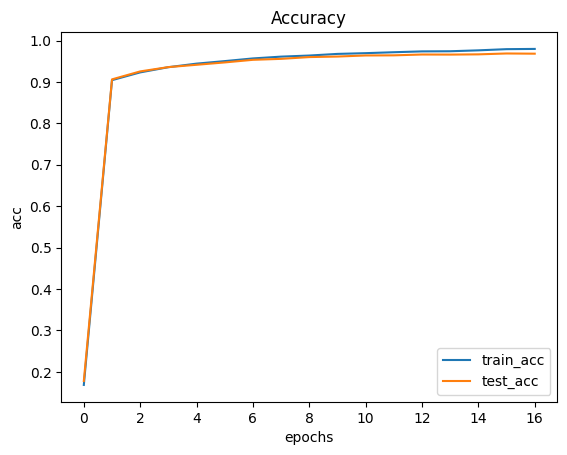

In [72]:
import matplotlib.pyplot as plt

plt.plot(train_acc_list, label='train_acc')
plt.plot(test_acc_list, label='test_acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.title('Accuracy')
plt.show()

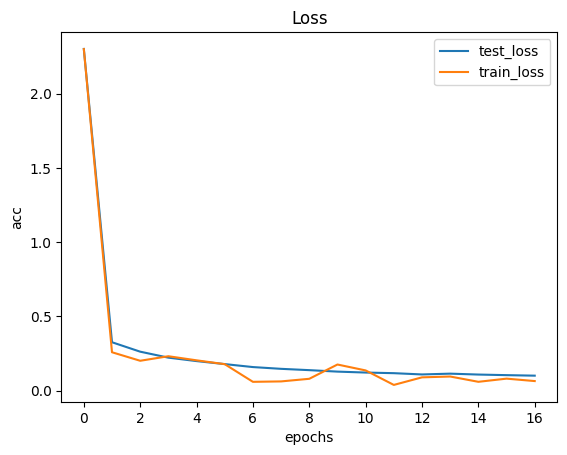

In [73]:
import matplotlib.pyplot as plt

plt.plot(test_loss_list, label='test_loss')
plt.plot(train_loss_list, label='train_loss')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title('Loss')
plt.legend()
plt.show()

# 정리
- 계산 그래프를 이용 계산 과정을 시각화 할 수 있다.
- 계산 그래프의 노드는 국소적 계산으로 구성된다.
    - 국소적 계산을 조합해 전체 계산을 할 수 있다.
- 계산 그래프의 순전파는 통상의 계산을 수행한다.
    - 계산 그래프의 역전파는 각 노드의 미분을 구할 수 있다.
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산 할 수 있다. (오차역전파법)
- 수치 미분과 오차역전파법의 결과를 비교하면, 오차역전파법의 구현에 잘못이 없음을 확인 할 수 있다 (기울기 확인)